In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

29.325500802158984 6.80782978017595
63.16762813772539 134.45897264642718
20.815918585672577 81.18377538059184
45.991904199263786 122.02660210625191
55.67004232498286 -20.328151331407952
-29.311570072706154 -14.559380512701608
-16.742454367140667 168.6520288133492
-38.46455410914469 5.163676957821735
83.44116365653883 -32.3240258001216
-20.11587242291121 -74.31503963313557
-3.153545611285267 46.044645150834924
-47.785305986356136 -16.31158509562232
15.716834422538852 -145.42658718742476
-36.172303039571055 -58.413759632240286
-37.563675990170196 -138.73771629527437
-13.035132053149965 -94.58785055682853
54.8655722972527 157.42982228028035
-61.5024852994488 -75.62067609911881
47.542378478523176 19.479326447784985
-48.17661657998342 57.08508029891249
-81.25840007228362 -24.811316222575584
-75.48657363730815 -35.6286838359332
-83.3019971002015 -125.48968876692021
57.57474474537628 -89.89099591795758
24.6404750090077 113.27617692529839
82.92841201828557 100.05638985242194
-52.02950480033975

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f3958889136524e4728d9e9b1249cc9


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | warqla
City not found. Skipping...
Processing Record 2 of Set 1 | khandyga
Processing Record 3 of Set 1 | balod
Processing Record 4 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | vila
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | camana
Processing Record 11 of Set 1 | kismayo
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | dolores
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | milkovo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | valko
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | ushuaia
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khandyga,62.6667,135.6000,67.93,79,0,2.13,RU,2022-07-20 19:43:57
1,Balod,20.7300,81.2047,75.54,91,100,6.29,IN,2022-07-20 19:43:57
2,Vestmannaeyjar,63.4427,-20.2734,54.59,87,20,16.11,IS,2022-07-20 19:43:58
3,Jamestown,42.0970,-79.2353,88.02,51,40,17.27,US,2022-07-20 19:43:58
4,Vila,42.0304,-8.1588,68.88,49,0,2.77,PT,2022-07-20 19:43:58
5,Saldanha,-33.0117,17.9442,46.45,62,0,12.68,ZA,2022-07-20 19:43:59
6,Camana,-16.6228,-72.7111,64.15,74,59,6.78,PE,2022-07-20 19:43:59
7,Kismayo,-0.3582,42.5454,75.15,79,94,16.37,SO,2022-07-20 19:41:41
8,Hilo,19.7297,-155.0900,81.28,94,100,5.75,US,2022-07-20 19:43:59
9,Dolores,-36.3132,-57.6792,61.77,54,6,9.75,AR,2022-07-20 19:44:00


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df=city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khandyga,RU,2022-07-20 19:43:57,62.6667,135.6000,67.93,79,0,2.13
1,Balod,IN,2022-07-20 19:43:57,20.7300,81.2047,75.54,91,100,6.29
2,Vestmannaeyjar,IS,2022-07-20 19:43:58,63.4427,-20.2734,54.59,87,20,16.11
3,Jamestown,US,2022-07-20 19:43:58,42.0970,-79.2353,88.02,51,40,17.27
4,Vila,PT,2022-07-20 19:43:58,42.0304,-8.1588,68.88,49,0,2.77
5,Saldanha,ZA,2022-07-20 19:43:59,-33.0117,17.9442,46.45,62,0,12.68
6,Camana,PE,2022-07-20 19:43:59,-16.6228,-72.7111,64.15,74,59,6.78
7,Kismayo,SO,2022-07-20 19:41:41,-0.3582,42.5454,75.15,79,94,16.37
8,Hilo,US,2022-07-20 19:43:59,19.7297,-155.0900,81.28,94,100,5.75
9,Dolores,AR,2022-07-20 19:44:00,-36.3132,-57.6792,61.77,54,6,9.75


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658347127.923024

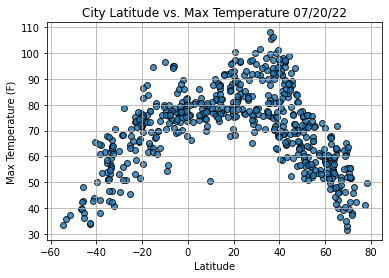

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

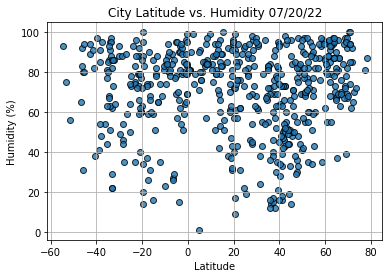

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

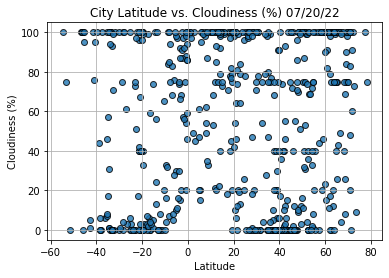

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

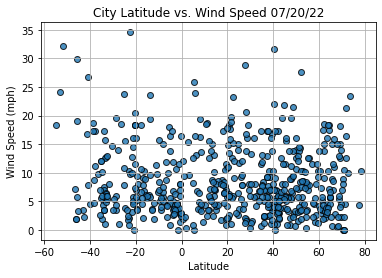

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
#print(weather_api_key)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
#city_data_df.head()

In [25]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-07-20 19:41:32
Lat                        -53.15
Lng                      -70.9167
Max Temp                    35.71
Humidity                       75
Cloudiness                     75
Wind Speed                  24.16
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
555     True
556    False
557     True
558     True
559    False
Name: Lat, Length: 560, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khandyga,RU,2022-07-20 19:43:57,62.6667,135.6000,67.93,79,0,2.13
1,Balod,IN,2022-07-20 19:43:57,20.7300,81.2047,75.54,91,100,6.29
2,Vestmannaeyjar,IS,2022-07-20 19:43:58,63.4427,-20.2734,54.59,87,20,16.11
3,Jamestown,US,2022-07-20 19:43:58,42.0970,-79.2353,88.02,51,40,17.27
4,Vila,PT,2022-07-20 19:43:58,42.0304,-8.1588,68.88,49,0,2.77


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

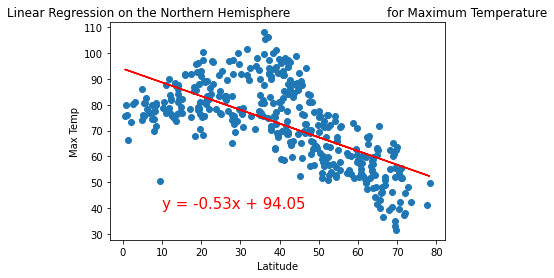

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

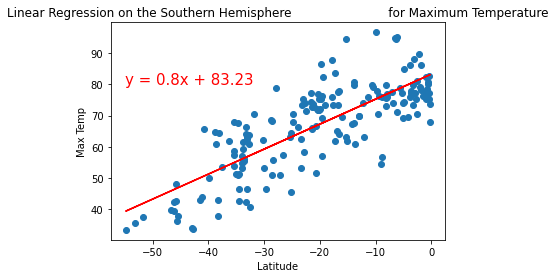

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

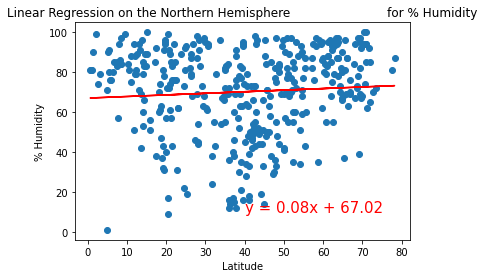

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

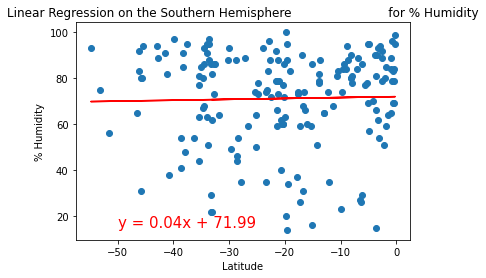

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

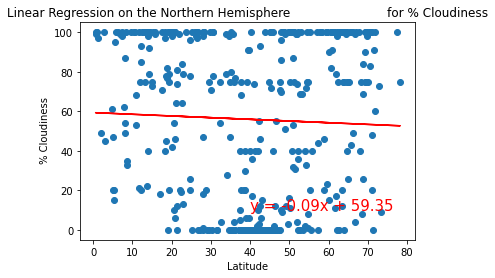

In [33]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', ' % Cloudiness',(40,10))

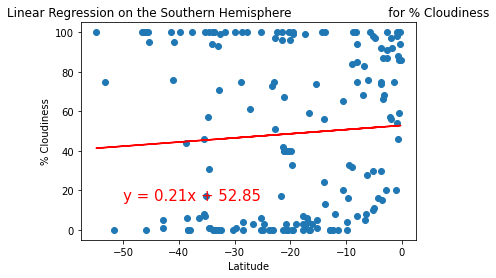

In [34]:
# Linear regression on the Southern Hemisphere - % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

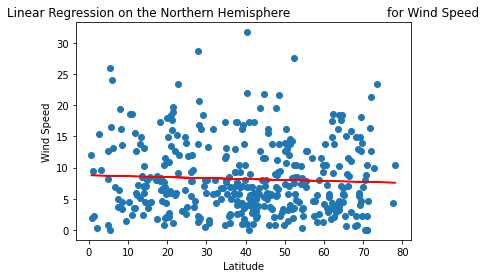

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

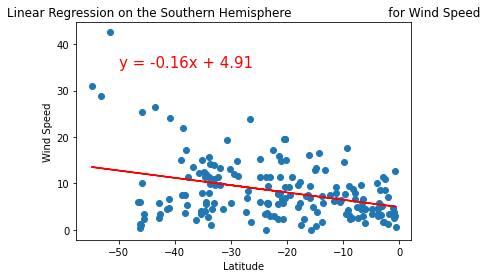

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))